In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from clean_tweets_dataframe import CleanTweets
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
df_tweet=pd.read_csv("processed_tweet_data.csv")

In [3]:
cleaner=CleanTweets(df_tweet)

Automation in Action...!!!


**Using cleaner module from clean_tweets_dataframe to clean the imported dataset**

In [4]:
df_tweet=cleaner.drop_unwanted_column(df_tweet)
df_tweet=cleaner.drop_duplicate(df_tweet)
df_tweet=cleaner.convert_to_datetime(df_tweet)
df_tweet=cleaner.convert_to_numbers(df_tweet)
df_tweet=cleaner.remove_non_english_tweets(df_tweet)

In [5]:
df_tweet.head()

,created_at,source,original_text,cleaned_text,polarity,subjectivity,sentiment,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
38,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,The 10-year yield is telling us that there's a...,0.16,0.540000,Positive,en,188,43,davideiacovozzi,18,55,NaN,"gold, silver, crypto",NorthstarCharts,NaN,NaN
39,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,"German 10y mortgage rate went from 0,8% to 2,5...",0.15,0.175000,Positive,en,179,32,davideiacovozzi,18,55,NaN,NaN,MichaelAArouet,NaN,NaN
41,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,When?,0.00,0.000000,Neutral,en,193,26,davideiacovozzi,18,55,False,NaN,goldseek,NaN,NaN
42,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,The 30-year mortgage rate in the US rises to 5...,0.00,0.183333,Neutral,en,620,213,davideiacovozzi,18,55,NaN,NaN,charliebilello,NaN,NaN
43,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,Rates rise until something breaks … is anythin...,-0.40,0.400000,Negative,en,1787,417,davideiacovozzi,18,55,False,NaN,biancoresearch,NaN,NaN


In [6]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16374 entries, 38 to 24622
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   created_at              16374 non-null  datetime64[ns, UTC]
 1   source                  16374 non-null  object             
 2   original_text           16374 non-null  object             
 3   cleaned_text            16374 non-null  object             
 4   polarity                16374 non-null  float64            
 5   subjectivity            16374 non-null  float64            
 6   sentiment               16374 non-null  object             
 7   lang                    16374 non-null  object             
 8   favorite_count          16374 non-null  int64              
 9   retweet_count           16374 non-null  int64              
 10  original_author         16374 non-null  object             
 11  followers_count         16374 non-null  

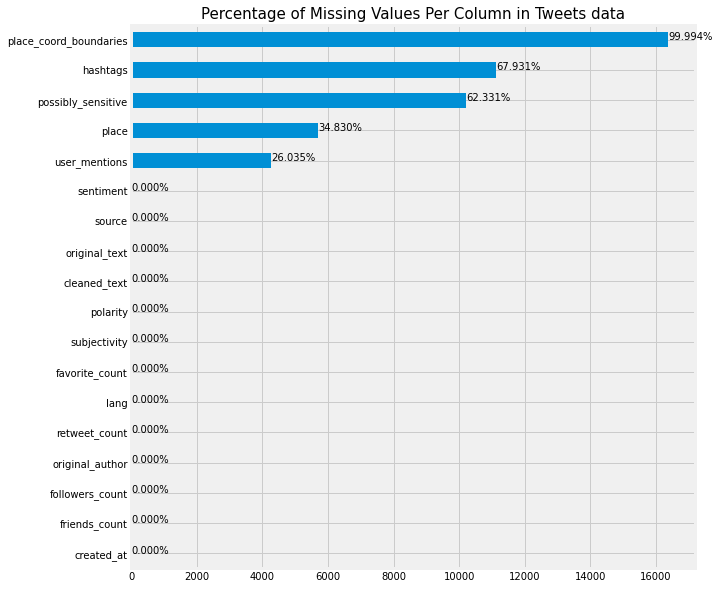

In [8]:
# Check the percentage of missing values in every column
ax = df_tweet.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Tweets data', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.3f}%'.format((p.get_width()/df_tweet.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [7]:
df_tweet.columns

Index(['created_at', 'source', 'original_text', 'cleaned_text', 'polarity',
       'subjectivity', 'sentiment', 'lang', 'favorite_count', 'retweet_count',
       'original_author', 'followers_count', 'friends_count',
       'possibly_sensitive', 'hashtags', 'user_mentions', 'place',
       'place_coord_boundaries'],
      dtype='object')

In [31]:
user_summary=df_tweet.groupby('original_author').agg({'cleaned_text':'count','followers_count':'max',
                                         'polarity':'mean','subjectivity':'mean', 'sentiment':pd.Series.mode})

In [34]:
user_summary.sort_values(by='cleaned_text',ascending=False)

,cleaned_text,followers_count,polarity,subjectivity,sentiment
original_author,,,,,
zaizaiUmar,50,761,0.112110,0.293913,Positive
ray_hessel,50,11231,0.074507,0.382108,Positive
MrS0ndheim,50,60,0.090435,0.366150,Positive
Moon50097307,50,1048,0.243333,0.330460,Positive
annabellas69,50,1953,0.327458,0.512167,Positive
...,...,...,...,...,...
TNNavbharat,1,58893,0.000000,0.000000,Neutral
eliceami,1,308,1.000000,1.000000,Positive
VizhuthugalM,1,227,0.406566,0.595960,Positive


Sentiment summary of the tweets

In [9]:
text_grouped = df_tweet.groupby('sentiment').count()['cleaned_text'].reset_index()

In [10]:
text_grouped

,sentiment,cleaned_text
0,Negative,2671
1,Neutral,7423
2,Positive,6280


<AxesSubplot:xlabel='sentiment', ylabel='count'>

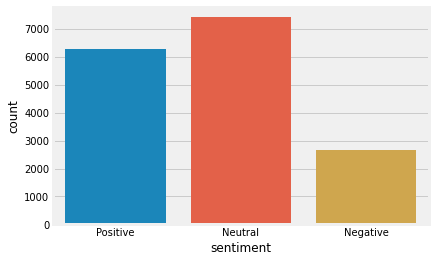

In [11]:
sns.countplot(x='sentiment', data=df_tweet)

**Most frequent words in our tweets dataset**

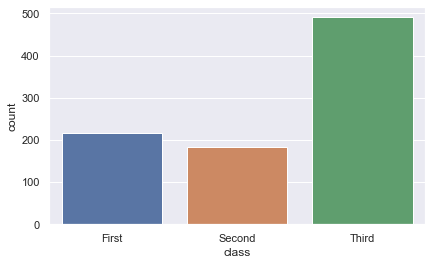

In [69]:
import seaborn as sns
sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="class", data=titanic)

In [12]:
english_word=df_tweet[['cleaned_text']][df_tweet['lang']=='en']

In [13]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in english_word.cleaned_text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

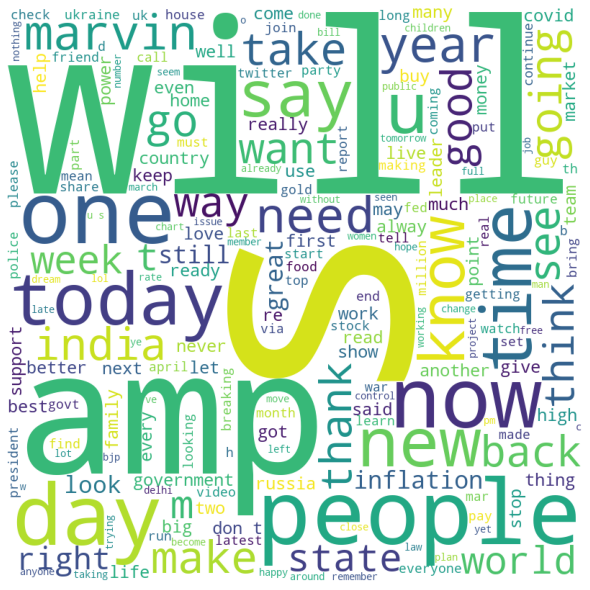

In [14]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()